# FRA503: Deep Reinforcement Learning – Homework 3 Report  
## Cart-Pole Stabilization using Function Approximation-based RL  

จัดทำโดย
1. อนวัช อนุสุเรนทร์ 65340500056
2. ชัญญาภัค ทรัพย์สวัสดิ์กุล 65340500067

## Part 1: Understanding the Algorithms

### 1.1 Linear Q-Learning

Linear Q-Learning เป็นอัลกอริธึมที่ใช้ Linear Function Approximation เพื่อประมาณค่า Q-function และเรียนรู้พารามิเตอร์ผ่านการอัปเดตแบบ Temporal Difference (TD-learning) ตาม Q-Learning

**Linear Q-Learning ใช้ได้เหมาะกับปัญหารูปแบบต่อไปนี้**

1. state space ที่มีขนาดเล็กหรือมีฟีเจอร์ชัดเจน 
    - เช่น  CartPole, GridWorld, หรือปัญหาที่สามารถแปลง state ให้เป็นเวกเตอร์คงที่ง่าย ๆ
    - เรียนรู้ได้ดีเมื่อฟีเจอร์มีความสัมพันธ์เชิงเส้นกับ reward
2. ใช้กับ continuous state ได้ ( Q-table ใช้กับ continuous state **ไม่ได้**)
    - ใช้ได้แม้ environment จะไม่มีการ discretize state
3. ต้องการคำนวณเร็ว (Efficient Computation) 
    - ไม่ต้องใช้ neural network, backpropagation หรือ replay buffer
    - ประหยัดเวลาและหน่วยความจำ

**Linear Q-Learning ไม่เหมาะกับปัญหารูปแบบต่อไปนี้**

1. งานที่ใช้ภาพ เสียง หรือข้อมูลดิบ  
   - เช่น กล้องในหุ่นยนต์ หรือเกมที่ใช้ภาพเป็น input  
   - Linear Q-Learning ไม่สามารถเรียนรู้จากข้อมูลดิบได้โดยตรง

2. ปัญหาที่มี Q-function ซับซ้อนหรือไม่เชิงเส้น 
   - เช่น ปัญหาที่ต้องใช้ decision boundary ที่โค้งหรือมีเงื่อนไขซับซ้อน  
   - Linear model ไม่สามารถเรียนรู้การแจกแจงที่ซับซ้อนใน state space ได้

3. งานที่ไม่มีการเตรียมฟีเจอร์ไว้ล่วงหน้า  
   - ถ้าไม่มีการแปลง state ให้เป็นเวกเตอร์ที่ดี โมเดลจะเรียนรู้ไม่ได้


#### ขั้นตอนการทำงาน

##### 1. แทน Q-function ด้วยสมการเชิงเส้น

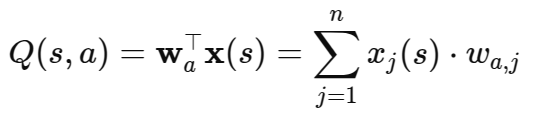

-    s                ->    state (สถานะของ agent)  
-    a                ->    action ที่ agent เลือกใน state \( s \)  
-   x(s)              ->    ฟีเจอร์เวกเตอร์ของ state \( s \)  
-   w_a               ->    เวกเตอร์พารามิเตอร์สำหรับ action \( a \)
-   w_ax(s)           ->    เวกเตอร์พารามิเตอร์สำหรับ action \( a \)
-   x_j(s)            ->    ฟีเจอร์ตัวที่ \( j \) ของ state \( s \)  
-   w_{a,j}           ->    น้ำหนักของฟีเจอร์ \( j \) สำหรับ action \( a \)  
-   Q(s, a)           ->    ค่าคาดการณ์ของ cumulative reward จาก state \( s \) เมื่อเลือก action \( a \)

**ข้อดี**
- ไม่ต้องเก็บ Q-table ซึ่งใช้ไม่ได้กับ continuous state
- ทำให้ Q-function สามารถ generalize(ประมาณค่าจากฟีเจอร์ได้) ได้แม้นว่า agent ไม่เคยเห็น state S มาก่อน
- ลดขนาดหน่วยความจำอย่างมากเพราะเป็น weight vector ต่อ action แทนที่จะเป็นตาราง

##### 2. เมื่อ agent ทำ action แล้วได้ transition = (s,a,r,s′) ให้ทำการคำนวน **TD target**

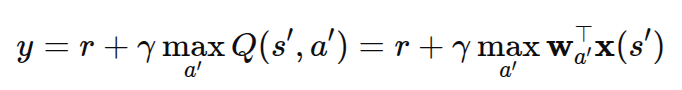

โดย
-   r               --------    รางวัลที่ได้รับทันทีจาก environment  
-   γ               --------    discount factor (ค่าที่ใช้ลดความสำคัญของ reward ในอนาคต)  
-   s′              --------    state ถัดไปที่ได้จากการทำ action  
-   a′              --------    action ที่เป็นไปได้ใน state ถัดไป \( s' \)  
-   x(s′)           ------    ฟีเจอร์เวกเตอร์ของ state \( s' \)  
-   w_{a′}          ---    เวกเตอร์พารามิเตอร์สำหรับ action \( a' \)  
-   y               --------    ค่า TD target ที่คำนวณได้จาก 


โดยการคำนวน TD target จะทำเพื่อ
- ประเมินรางวัลในอนาคต ใช้ reward ปัจจุบัน 𝑟 + ค่าคาดหวังจาก state ถัดไป 𝑠′
- ทำให้ agent ไม่เรียนรู้แค่ immediate reward แต่ เรียนรู้ cumulative reward ด้วย
- เป็นการคำนวน ค่าที่ควรจะได้(target) เพื่อใช้เทียบกับ Expected Value

##### 3. คำนวณ TD error จากการเอา Taget - Q

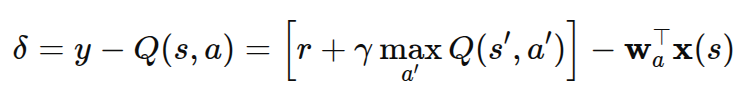

คำนวณ TD error จะทำเพื่อ
- บอกว่าปัจจุบัน agent คาดผิดไปมากน้อยแค่ไหน

##### 4. อัปเดตเวกเตอร์ 𝑤_𝑎 (ใช้ stochastic gradient descent)

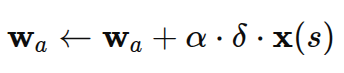

อัปเดตเวกเตอร์ 𝑤_𝑎 ทำเพื่อ
- ปรับ weight เพื่อให้ Q-function เก่งขึ้น
- คูณกับ 𝑥(𝑠) เพื่อบอกว่าแต่ละ feture มีผลต่อการปรับมากแค่ไหน
 

### 1.2 Deep Q-Network (DQN)  

DQN เป็นอัลกอริธึมที่ใช้ Neural Network แทน Q-table หรือฟังก์ชันเชิงเส้น เพื่อประมาณค่า Q(s, a)  
เหมาะกับปัญหาที่มีข้อมูลซับซ้อน เช่นภาพ หรือ state ที่มีหลายมิติ

**DQN มีแนวคิดหลักดังนี้**

1. ใช้ Neural Network แทน Q-function  
   - รองรับข้อมูลที่ไม่สามารถจำแนกได้ด้วยฟังก์ชันเชิงเส้น เช่น ภาพหรือข้อมูลที่มีความซับซ้อนสูง

2. ใช้ Replay Buffer  
   - เก็บประสบการณ์ที่ agent เจอในแต่ละ timestep เรียกว่า “transition” ซึ่งประกอบด้วย  
     \( (s, a, r, s') \): state, action, reward, และ next state  
   - สุ่ม transition จาก buffer มาเรียนซ้ำ ทำให้ลดความลำเอียงจากข้อมูลล่าสุด และเพิ่มความเสถียรในการเรียนรู้

3. ใช้ Target Network  
   - แยก Q-network ออกเป็น 2 ตัว >> policy network และ target network 
   - ลดความไม่เสถียรจากการที่ target เปลี่ยนเร็วเกินไป

4. ใช้ TD target แบบ Q-learning  
   - คำนวณ TD target
   - ใช้ค่า TD target นี้เทียบกับ output จาก network เพื่อคำนวณ TD error

5. อัปเดตด้วย gradient descent  
   - ใช้ backpropagation ปรับพารามิเตอร์ของ Q-network จาก TD error  
   - ไม่ต้องออกแบบฟีเจอร์เอง เพราะ network เรียนรู้ representation ได้โดยตรงจากข้อมูล

#### ขั้นตอนการทำงาน

##### 1. นิยาม Neural Network สำหรับ Q-function

สร้าง Q-function ที่ใช้ประเมินว่า action ไหนดีที่สุดในแต่ละ state โดยไม่ต้องใช้ Q-table

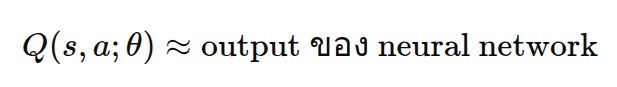


- s --------- state ปัจจุบัน
- a --------- action ที่สนใจ
- Q(s,a;θ) -- ค่าที่บอกว่าถ้าทำ action a ที่ state s จะคาดหวังผลรวม reward เท่าไหร่
- θ --------- พารามิเตอร์ทั้งหมดของ neural network (weights, biases)

##### 2. เลือก action ด้วย epsilon-greedy


##### 3. ทำ action ใน environment แล้วเก็บเป็น transition ลงใน Replay Buffer
เก็บข้อมูลของประสบการณ์ไว้ให้ Agent สามารถเรียนรู้แบบ batch ได้รูปแบบข้อมูล (transition)

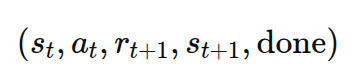


- s_t ----- state ปัจจุบัน
- a_t ----- action ที่ทำ
- r_t+1 ---reward ที่ได้
- s_t+1 --- state ถัดไป
- done --- บอกว่า episode จบแล้วหรือยัง

เก็บ transition ลงใน Replay Buffer ทำเพื่อ
- แต่ละ transition คือประสบการณ์ที่ agent ใช้ฝึก network
- เก็บไว้ใน buffer เพื่อให้สุ่มมาใช้ซ้ำได้ ไม่ต้องเรียนทันที
- ลดปัญหาข้อมูลเบ้ และช่วยให้ network ได้เรียนรู้จากหลายช่วงของเก

##### 4. เมื่อ buffer มีข้อมูลพอจะทำการสุ่ม mini-batch ขึ้นมา

สุ่ม transition จาก buffer จำนวน 𝑁 ตัว เช่น 32 หรือ 64 ตัวอย่าง (เรียกว่าหนึ่ง mini-batch) มาใช้ในฝึกมาใช้ฝึก Q-network ในรอบนั้น

**ความสำคัญของ mini batch**
- ต้องสุ่ม mini batch เพราะถ้าใช้ตัวอย่างน้อย หรือมีเพียงตัวอย่างเดียว variance จะสูงมาก แต่ถ้าใช้ mini-batch จะเสมือนเรานำ TD error จากหลาย transition มาหาค่าเฉลี่ย ทำให้ gradient ที่คำนวณได้นิ่งขึ้น เพราะ noise จากแต่ละ sample จะหักล้างกันบางส่วน

**การเลือกใช้งาน mini batch**
- ถ้าใช้ transition ทั้งหมดใน buffer (full batch) → จะได้ gradient แม่นยำมาก แต่ต้องใช้เวลาเยอะ
- การใช้ mini-batch ขนาดเล็ก เป็นทางสายกลาง → เร็วกว่ามาก แต่ยังได้ gradient ที่เพียงพอสำหรับการฝึก

##### 5. คำนวณ TD target จาก target network

สร้างค่า “คำตอบที่ควรจะเป็น” (target) เพื่อใช้ฝึก Q-network (ใช้สมการเดียวกันกับ Linear Q)

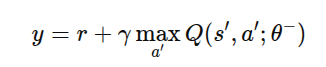


- y         ----- ค่าที่ควรจะได้ (TD target)  
- r         ----- reward ที่ได้รับ  
- gamma     ----- discount factor (ค่าที่ลดความสำคัญของ reward ในอนาคต)  
- s'        ----- state ถัดไป  
- theta^-   ----- พารามิเตอร์ของ target network  
- max a'    ----- หาค่า Q ที่ดีที่สุดใน state ถัดไป



##### 6. คำนวณ TD error และ loss

วัดความคลาดเคลื่อนระหว่างค่าที่ควรจะได้ (TD target) กับค่าที่ Q-network ทำนาย เพื่อให้รู้ว่าควรปรับพารามิเตอร์มากน้อยแค่ไหน (หลักการเดียวกันกับ Linear Q)

ถ้า Q ทำนายดี >> TD error ใกล้ 0 >> loss ต่ำ


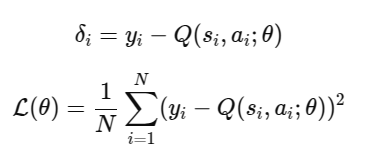

- delta_i    ---------- TD error ของ transition ที่ i  
- y_i        ------------- TD target ที่คำนวณจาก target network  
- Q(s_i,a_i) ----- ค่าที่ Q-network ทำนาย  
- theta      --------- พารามิเตอร์ของ Q-network  
- L(theta)   ----- ค่า loss รวมจาก mini-batch  
- N          -------------- จำนวนตัวอย่างใน mini-batch


สิ่งที่ควรระวังของการคำนวน TD error 
- TD target ยังมี bias เพราะไม่ได้มาจากค่าจริง (เป็นค่าประมาณจาก network อีกตัว)
- ถ้า Q-network ทำนายไม่ดีในตอนแรก loss จะสูงมาก >> อาจทำให้ learning สวิง

##### 7.ปรับพารามิเตอร์ Q-network ด้วย gradient descent

ปรับค่าพารามิเตอร์ของ Q-network เพื่อลด TD error โดยใช้ gradient จาก loss ที่คำนวณได้จากสมการ

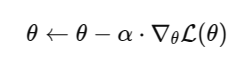

- theta         ----- พารามิเตอร์ของ Q-network  
- alpha         ----- learning rate (กำหนดความแรงของการอัปเดต)  
- grad L(theta) ----- ความชันของ loss เทียบกับพารามิเตอร์ theta  
- L(theta)      ----- ค่า loss ที่ได้จาก TD error

**หลักการปรับพารามิเตอร์ Q-network**

1. ใช้ backpropagation เพื่อคำนวณว่า พารามิเตอร์ 𝜃 ชั้นไหนควรปรับเท่าไหร่ เพื่อให้ Q(s, a) เข้าใกล้ TD target  มากขึ้น ได้ผลลัพธ์เป็น gradient ของ loss เทียบกับพารามิเตอร์แต่ละตัว
2. หลังจากได้ gradient แล้ว ใช้ optimizer ควบคุมการอัปเดต โดย optimizer จะมีดังนี้
    - SGD (Stochastic Gradient Descent) >> อัปเดตตรง ๆ จาก gradient

    - Adam >> อัปเดตโดยดู momentum + adaptive learning rate (เรียนรู้เร็วขึ้น + เสถียรขึ้น)

    - RMSprop, AdaGrad, etc. >> เทคนิคปรับ learning rate ในแต่ละ dimension


##### 8. อัปเดต target network เป็นระยะ
ทำให้ target ที่ใช้สอน Q-network มีความเสถียร โดยการอัปเดตช้ากว่า Q-network โดยมีการ อัปเดต 2 แบบ
1. hard update

    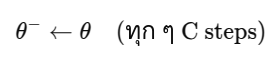

- theta       ----- พารามิเตอร์ของ Q-network  
- theta^-     ----- พารามิเตอร์ของ target network  
- C           ----- จำนวนรอบที่รอจึงอัปเดต (ใช้กับ hard update)  


2. soft update

    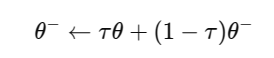


- theta       ----- พารามิเตอร์ของ Q-network  
- theta^-     ----- พารามิเตอร์ของ target network  
- tau         ----- อัตราการผสม (ใช้กับ soft update) เช่น 0.005


### 1.3 MC REINFORCE Algorithm

**MC REINFORCE มีหลักการสำคัญคือ** 
1. MC REINFORCE เป็นอัลกอริธึมในกลุ่ม Policy Gradient ที่สอน agent ให้ปรับปรุง policy โดยตรง ไม่ต้องผ่านการประมาณ Q-value หรือใช้ TD target แบบ Q-learning หรือ DQN 

2. REINFORCE จะเลือก action โดยใช้ stochastic policy ในการสุ่มเลือกจาก distribution ต่างจาก DQN ที่เลือก action ที่ Q สูงสุด ซึ่งการใช้ stochastic policyช่วยให้ agent มีโอกาสเรียนรู้พฤติกรรมที่หลากหลายกว่า deterministic policy
    - stochastic policy คือ policy ที่เลือก action แบบสุ่ม โดยอิงจาก ความน่าจะเป็นที่เรียนรู้ได้ ตัวอย่างเช่น เมื่อ agent อยู่ใน state ใดๆ จะไม่ได้เลือก action เดียวเสมอไป แต่จะ สุ่ม action ออกมาตาม distribution

        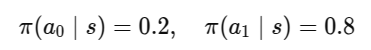

        agent มีโอกาส 20% เลือก a0 และ 80% เลือก a1 ขึ้นกับการสุ่มในรอบนั้น

3. REINFORCE ใช้ return จากการ **เล่นให้จบทั้ง episode** มาปรับปรุง policyย้อนกลับ (หลักการเดียวกันกับ Monte Carlo)

**ข้อดี**
- ไม่มี bias จากการประเมิน (เพราะใช้ return จริง ๆ ไม่ได้คาดการณ์)
- ไม่ต้องมี target network หรือ Q-function
- รองรับ stochastic policy ได้ดี
- ใช้ได้กับ discrete และ continuous action space

**ข้อเสีย**

- ต้องเล่นจนจบทุกครั้ง = ช้า
- ถ้าตัวอย่างมีความหลากหลายสูง = gradient จะผันผวนมาก
- ต้องใช้การ sampling ตลอดเวลา = มี variance สูง
- Sensitive ต่อความยาว episode และ variance ของ reward

#### ขั้นตอนการทำงาน

##### 1. นิยาม Policy Network

สร้าง soft policy ที่เรียนรู้ได้ โดยให้ network ทำนายโอกาสเลือกแต่ละ action

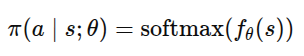

- s        ------- state ปัจจุบัน  
- a        ------- action ที่จะสุ่มจาก distribution  
- theta    -- พารามิเตอร์ของ policy network  
- π(a|s)  - โอกาสที่จะเลือก action a ณ state s


##### 2. สุ่ม trajectory ทั้ง episode โดยใช้ policy

ให้ agent เล่นไปเรื่อย ๆ จนจบ episode แล้วเก็บทุก transition เพื่อดูว่าแต่ละ action ที่เลือกนำไปสู่ reward สุดท้ายเท่าไหร่ โดยจะไม่มีการ bootstrap เหมือน TD แต่จะใช้ผลลัพธ์จริงจากอนาคต

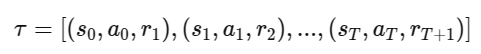

- tau        -- ลำดับของ state, action, reward ตลอดทั้ง episode  
- T          ----- ความยาวของ episode  
- r_t        --- reward ที่ได้ ณ timestep t  




##### 3. คำนวณ Return สำหรับแต่ละ timestep

ใช้ cumulative reward (return) ที่ได้หลังจากทำ action ในแต่ละ state เป็นตัวสอน โดยถ้า agent ได้ reward สูงในภายหลังก็จะได้รางวัลสูง

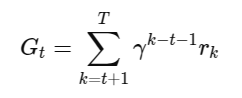

- G_t ------- return รวมจาก timestep t ไปจนจบ episode  
- gamma - discount factor  
- r_k -------- reward ที่ได้ในแต่ละ timestep k  


##### 4. คำนวณ Gradient จาก log-probability

อัปเดต policy โดยใช้ gradient ของ log-prob ที่ทำให้ return สูงขึ้น มีขั้นตอนดังนี้

1. เพิ่ม expected return จาก policy (π𝜃) มีสมการตั้งต้นดังนี้ 

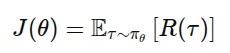

- θ ---- พารามิเตอร์ของ policy 
- τ ---- trajectory ที่ได้จากการเล่น 1 episode
- R(τ) - ผลรวม reward จาก episode นั้น (scalar)

2. หาทิศทาง gradient เพื่อหาว่าจะทำยังไงให้ reward โดยเฉลี่ยสูงขึ้น

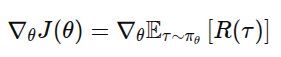

****แต่ว่า เพราะค่า Reward R(τ) ขึ้นกับการสุ่มจาก environment โดยไม่รู้รูปฟังก์ชัน R(τ;θ) ทำให้ไม่สามารถเขียนเป็นฟังก์ชันของ 𝜃 ได้โดยตรง ส่งผลให้ไม่สามารถคำนวนหา gradient ตรง ๆ ได้ เช่น ถ้า R(τ) เป็น scalar จะทำให้ gradient จะมีค่าเป็น 0 เสมอ 

****แก้ไขได้โดยขั้นตอนที่ 3 

3. ใช้เทคนิค Likelihood Ratio Trick ทำให้คำนวน gradient ง่ายขึ้น
แปลง gradient ของ expected return ให้อยู่ในรูปของ log-probability 

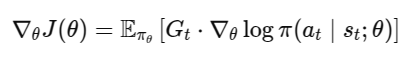

- J(theta) ---- expected return ที่เราต้องการเพิ่ม  
- log pi(a|s) - log-probability ของ action ที่เลือก  
- G_t --------- return ที่ใช้เป็น signal ว่า action นี้ดีหรือไม่ดี  
- grad J ------ ทิศทางที่ควรปรับพารามิเตอร์เพื่อเพิ่ม performance


##### 5. ปรับพารามิเตอร์ด้วย gradient ascent

ต้องการ maximize expected return โดยถ้า action นั้นดี (G_t สูง) → ก็เพิ่มโอกาสในอนาคต

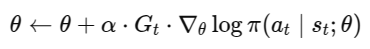

- theta -- พารามิเตอร์ของ policy network  
- alpha -- learning rate  
- G_t ----- return ที่ได้จาก episode  
- grad log pi  -- ทิศทางของการเพิ่มโอกาสใน action ที่ดี



### 1.4 Actor-Critic Algorithm (Deep Deterministic Policy Gradient (DDPG))

DDPG คือ Actor-Critic เวอร์ชัน deterministic ใช้สำหรับ continuous action space โดยผสมหลักการของ DQN (replay buffer, target network) เข้ากับ policy gradient
ต่างจาก AC แบบทั่วไปเพราะ AC ทั่วไปใช้ stochastic policy, on-policy learning, และ advantage estimation

**เปรียบเทียบความแตกต่างของ  Deterministic Policy กับ Stochastic Policy**

1. Deterministic Policy 

state เดิม → ได้ action เดิมเสมอ โดยไม่มีความสุ่มเข้ามาเกี่ยวข้อง

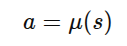

- a       ----- action ที่ agent จะเลือกทำ  
- s       ----- state ปัจจุบันของ environment  
- μ(s)    ----- deterministic policy function ที่ให้ action เดียวจาก state นั้น


2. Stochastic Policy

state เดิม → ได้ action ต่างกันได้ตามการสุ่มจาก distribution

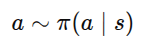

- a             ----- action ที่ถูกสุ่มออกมา  
- s             ----- state ปัจจุบันของ environment  
- π(a | s)      ----- stochastic policy: ความน่าจะเป็นในการเลือก action a เมื่ออยู่ใน state s  
- a ∼ π(a|s)    ----- หมายถึง สุ่ม action a ตาม distribution π ที่ขึ้นกับ state s




#### ขั้นตอนการทำงาน 

##### 1. สร้าง Actor และ Critic Network

**Actor** 

- ใช้สำหรับสร้าง action จาก state
- Actor เป็น policy ที่เรียนรู้ได้

**Critic** 

- ใช้สำหรับประเมินคุณภาพของ state-action (Q-value)
- Critic เป็นตัวให้ feedback ว่า action ที่เลือกนั้นดีแค่ไหน


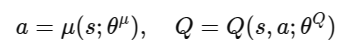

- s                ----- state ปัจจุบัน  
- a                ----- action ที่ actor สร้างขึ้น  
- μ(s;θ^μ)         ----- deterministic policy (actor)  
- Q(s,a;θ^Q)       ----- Q-value ที่ critic ประเมิน  
- θ^μ              ----- พารามิเตอร์ของ actor  
- θ^Q              ----- พารามิเตอร์ของ critic



##### 2.ใช้ Actor เล่นกับ Environment และเก็บลง Replay Buffer
ใช้ actor (policy ที่เรียนรู้ได้) ในการเลือก action → ได้ transition แล้วเก็บลง buffer

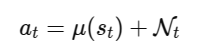

- a_t         ----- action ที่จะนำไปใช้  
- μ(s_t)      ----- action ที่ actor ทำนาย  
- 𝒩_t         ----- noise (เช่น Ornstein–Uhlenbeck) ที่เติมเพื่อการสำรวจ  
- replay buffer  ----- หน่วยความจำที่เก็บ transition (s, a, r, s′, done)



##### 3. สุ่ม mini-batch จาก Replay Buffer

ใช้ transition ที่เก็บไว้ มาฝึก network แบบ batch

##### 4. คำนวณ TD Target จาก Target Critic และ Target Actor

## Part 2: Agent Implementation Architecture

In [ ]:
import numpy as np
from collections import defaultdict, namedtuple, deque
import random
from enum import Enum
import os
import json
import torch
import torch.nn as nn

### 2.1 RL Base Class (`BaseAlgorithm`)

#### 2.1.1 __init__

ฟังก์ชัน Constructor ทำหน้าที่กำหนดค่าพารามิเตอร์เริ่มต้นที่จำเป็นต่อการเรียนรู้ของ RL Agent มีหน้าที่คือ

In [ ]:
def __init__(
        self,
        num_of_action: int = 2,
        action_range: list = [-2.0, 2.0],
        learning_rate: float = 1e-3,
        initial_epsilon: float = 1.0,
        epsilon_decay: float = 1e-3,
        final_epsilon: float = 0.001,
        discount_factor: float = 0.95,
        buffer_size: int = 1000,
        batch_size: int = 1,
    ):
        # กำหนด learning rate ซึ่งใช้ในกระบวนการอัปเดตพารามิเตอร์ เช่น น้ำหนักของฟังก์ชัน Q
        self.lr = learning_rate
        # ค่า discount factor (gamma) ใช้ควบคุมว่าระบบให้ความสำคัญกับ reward ระยะยาวมากแค่ไหน
        self.discount_factor = discount_factor
        # กำหนดค่าเริ่มต้นของ epsilon ซึ่งใช้ในนโยบาย epsilon-greedy เพื่อสุ่ม action ช่วงเริ่มต้นการเรียนรู้
        self.epsilon = initial_epsilon
        # กำหนดอัตราการลด epsilon ต่อ timestep เพื่อควบคุมให้ agent ลดการสำรวจเมื่อเรียนรู้มากขึ้น
        self.epsilon_decay = epsilon_decay
        # กำหนดค่าต่ำสุดของ epsilon เพื่อคงไว้ซึ่งการสำรวจในระดับหนึ่งแม้หลังฝึกไปแล้วนาน
        self.final_epsilon = final_epsilon
        # กำหนดจำนวนของ action ที่ environment รองรับ เช่น ซ้าย/ขวา (discrete actions)
        self.num_of_action = num_of_action
        # กำหนดช่วงของ action แบบต่อเนื่อง [min, max] เช่น [-2.0, 2.0] สำหรับ environments ที่ต้องการ continuous action
        self.action_range = action_range

        # q_values: ใช้เก็บค่าประมาณ Q(s, a) สำหรับ state-action pairs
        # ใช้ defaultdict เพื่อสร้าง array ของ Q-values ที่มีค่าเริ่มต้นเป็นศูนย์
        self.q_values = defaultdict(lambda: np.zeros(self.num_of_action))

        # n_values: ใช้เก็บจำนวนครั้งที่เราเลือก action แต่ละตัวในแต่ละ state → ใช้กับ Monte Carlo methods หรือ tracking ความถี่
        self.n_values = defaultdict(lambda: np.zeros(self.num_of_action))

        # training_error: ใช้เก็บค่าความผิดพลาดระหว่าง training แต่ละรอบ เพื่อใช้ plot หรือ debug performance
        self.training_error = []

        # self.w คือ matrix สำหรับน้ำหนักของ linear Q-value function
        # โดย Q(s, a) = s^T * w[:, a] (s ∈ ℝ^n, w ∈ ℝ^(n x m))
        # เช่นถ้า state มี 4 feature และมี 2 action → w.shape = (4, 2)
        self.w = np.zeros((4, num_of_action))
        
        # memory: สร้าง replay buffer สำหรับเก็บ transition (state, action, reward, next_state)
        # ใช้ในอัลกอริธึมแบบ off-policy เช่น DQN ซึ่งต้องใช้ข้อมูลในอดีตแบบสุ่มมา train
        self.memory = ReplayBuffer(buffer_size, batch_size)

#### 2.1.1 Function q
ฟังก์ชันสำหรับคำนวณค่า Q(s, a) โดยใช้ linear approximation  >> Q(s, a) = dot(s, w[:, a]) หรือ Q(s) = dot(s, W)

**Parameters**
- obs >> observation ปัจจุบัน (state) อาจอยู่ในรูป dict, tensor หรือ array
- a >> Index ของ action (ถ้ามี)

**Returns**
- ค่า Q(s, a) ถ้าระบุ action หรือ Q(s) vector ถ้าไม่ระบุ action

In [ ]:
def q(self, obs, a=None):
        # ตรวจสอบว่า obs อยู่ในรูป dict เช่น {"policy": state_vector} → ใช้เฉพาะ key ที่ต้องการ
        if isinstance(obs, dict) and "policy" in obs:
            obs = obs["policy"]

        # ถ้า obs เป็น tensor จาก PyTorch → ต้องแปลงเป็น NumPy array เพื่อใช้กับ np.dot
        if isinstance(obs, torch.Tensor):
            obs = obs.detach().cpu().numpy()

        # แปลงให้อยู่ในรูปแบบ NumPy float32 เพื่อให้แน่ใจว่าการคำนวณไม่มีปัญหาประเภทข้อมูล
        obs = np.array(obs, dtype=np.float32)

        # ถ้ามีระบุ action → คืนค่า Q(s, a) ซึ่งเป็น dot product ระหว่าง state vector และ vector น้ำหนักของ action นั้น
        if a is not None:
            return float(obs.dot(self.w[:, a]))
        else:
            # ถ้าไม่ระบุ action → คืน Q(s) เป็น vector ของ Q สำหรับทุก action
            return obs.dot(self.w)

#### 2.1.2 Scale action 
แปลง action ที่เป็นค่า index (0, 1, 2, ...) ให้เป็นค่า Continuous ในช่วง [action_min, action_max] เพื่อใช้กับ environment ที่ต้องการค่า Continuous (IsaacGym / IsaacSim)

**Return**
- Tensor ที่มี shape [1, 1] และ dtype เป็น float32

In [ ]:
def scale_action(self, action):
        # แยกค่าขอบเขตของ action
        action_min, action_max = self.action_range

        # แปลง action index → เป็น fraction [0.0 - 1.0] ตามตำแหน่ง
        fraction = action / (self.num_of_action - 1) if self.num_of_action > 1 else 0.0

        # ใช้ linear interpolation เพื่อสเกลไปยังค่า Continuous ในช่วงที่กำหนด
        scaled = action_min + fraction * (action_max - action_min)

        # แปลงเป็น tensor [1, 1] เพื่อให้สอดคล้องกับรูปแบบ input ของ IsaacSim และย้ายไป GPU
        return torch.tensor([[scaled]], dtype=torch.float32).to("cuda")

#### 2.1.3. Decay epsilon
คำนวณและลดค่า epsilon อย่างต่อเนื่องเพื่อควบคุมอัตราการสำรวจของ agentช่วยให้ agent ค่อย ๆ เปลี่ยนจากการสุ่มไปสู่การเลือก action ที่ดีที่สุด

**Parameter** 
- time_step >> จำนวน timestep ทั้งหมดที่ใช้สำหรับ decay

In [ ]:
def decay_epsilon(self, time_step):
    # คำนวณว่าควรลด epsilon เท่าไรต่อหนึ่ง timestep → linear decay strategy
    epsilon_decrease = (1.0 - self.final_epsilon) / time_step
    
    # ลดค่า epsilon ทีละน้อยในแต่ละรอบ แต่ไม่ให้ต่ำกว่าค่าต่ำสุด
    self.epsilon = max(self.final_epsilon, self.epsilon - epsilon_decrease)

#### 2.1.4 Save weight
บันทึก matrix น้ำหนัก weight (`w`) ลงไฟล์ .npy 

In [ ]:
def save_w(self, path, filename):
        # รวม path และชื่อไฟล์เข้าด้วยกัน
        full_path = os.path.join(path, filename)

        # ใช้ NumPy บันทึก array ลงไฟล์
        np.save(full_path, self.w)
        print(f"Weights saved to {full_path}.")

#### 2.1.5 Load weight
โหลดน้ำหนัก weight (`w`) จากไฟล์ .npy ที่เคยบันทึกไว้ เพื่อใช้ต่อจาก training ที่แล้ว

In [ ]:
def load_w(self, path, filename):
    # รวม path และชื่อไฟล์
    full_path = os.path.join(path, filename)
    
    # ตรวจสอบว่าไฟล์มีอยู่จริงหรือไม่
    if os.path.exists(full_path):
        self.w = np.load(full_path)
        print(f"Weights loaded from {full_path}.")
    else:
        print(f"File {full_path} does not exist. Unable to load weights.")

### 2.2 Replay Buffer

#### 2.2.1. __init__
ฟังก์ชัน Constructor สำหรับสร้าง replay buffer ที่ใช้เก็บประสบการณ์ (transitions) เพื่อให้ agent สามารถฝึกจากประสบการณ์เก่าได้ โดยไม่ต้องอิงกับ timestep ล่าสุดเสมอ (off-policy)

**Parameters**
- buffer_size (int) >> จำนวนสูงสุดของ transition ที่สามารถเก็บได้ใน buffer
- batch_size (int) >>  จำนวนประสบการณ์ที่จะสุ่มมาใช้ในการ train ต่อรอบ


In [ ]:
def __init__(self, buffer_size, batch_size = 1):
    # ใช้ deque ซึ่งเป็นโครงสร้างข้อมูล queue แบบ double-ended
    # ตั้งค่า maxlen = buffer_size เพื่อให้ buffer มีขนาดจำกัด
    # หาก buffer เต็ม จะลบข้อมูลเก่าทิ้งอัตโนมัติ (FIFO)
    self.memory = deque(maxlen=buffer_size)

    # บันทึกขนาดของ batch ที่จะสุ่มมาในการฝึกแต่ละครั้ง
    self.batch_size = batch_size

#### 2.2.2. Add transition
เพิ่ม transition (s, a, r, s', done) หนึ่งรายการเข้าสู่ replay buffer

**Parameters**
- state (Tensor) >> สถานะปัจจุบันของ environment
- action (Tensor) >> ค่าการกระทำที่ agent เลือกใน state นี้
- reward (Tensor) >> รางวัลที่ได้รับหลังจากกระทำ action นั้น
- next_state (Tensor) >> สถานะใหม่ที่เกิดขึ้นหลังจาก action
- done (bool) >> เป็น True ถ้า episode สิ้นสุดที่ next_state

In [ ]:
def add(self, state, action, reward, next_state, done):
    # สร้าง tuple จาก 5 องค์ประกอบของประสบการณ์ แล้วเพิ่มเข้าไปใน buffer
    # ข้อมูลนี้จะถูกใช้ในการฝึก agent ภายหลัง
    self.memory.append((state, action, reward, next_state, done))

#### 2.2.3. Random Sample
สุ่มประสบการณ์จำนวนหนึ่งจาก buffer เพื่อนำไปใช้ฝึก neural network

**Returns**
- state_batch (tuple)>> กลุ่มของ states
- action_batch (tuple)>> กลุ่มของ actions
- reward_batch (tuple)>> กลุ่มของ rewards
- next_state_batch (tuple)>> กลุ่มของ next states
- done_batch (tuple)>> กลุ่มของสถานะจบ episode (True/False)

In [ ]:
def sample(self):
    # สุ่ม batch_size จำนวนตัวอย่างจาก buffer โดยไม่ซ้ำกัน
    experiences = random.sample(self.memory, k=self.batch_size)

    # ใช้ zip(*) เพื่อแยกข้อมูลจาก list ของ tuples → กลายเป็น tuple ของ lists
    # เช่น จาก [(s1,a1,r1,s1',d1), (s2,a2,r2,s2',d2)] → (s1,s2), (a1,a2), ...
    states, actions, rewards, next_states, dones = zip(*experiences)

    # คืนค่าทั้ง 5 กลุ่มข้อมูลเพื่อใช้ใน training
    return states, actions, rewards, next_states, dones

#### 2.2.4. Len Buffer
คืนค่าจำนวนข้อมูลปัจจุบันที่เก็บไว้ใน buffer

**Returns**
- int >> จำนวนประสบการณ์ที่ถูกเก็บใน buffer

In [ ]:
def __len__(self):
    return len(self.memory)

### 2.3 Algorithm Class Implementations

#### 2.3.1 Linear Q Learning 

Linear Q-Learning เป็นการใช้สมการเชิงเส้นแทน Q-table เพื่อประมาณค่าของ Q(s,a) ซึ่งช่วยให้สามารถนำ Q-Learning ไปใช้กับสถานะที่มีลักษณะเป็นเวกเตอร์ต่อเนื่อง หรือมีจำนวนมากเกินกว่าจะเก็บในตารางได้ โดยยังคงใช้หลักการอัปเดตแบบเดิมจาก Bellman Equation เหมือน Q-Learning ทั่วไป

**ข้อดี** >> ช่วยให้โมเดลสามารถ "เรียนรู้ร่วมกัน" ระหว่างสถานะที่คล้ายกัน และใช้หน่วยความจำน้อยกว่าแบบตารางมาก

1. **Update**

ฟังก์ชัน update() ใช้สำหรับ ปรับค่าน้ำหนัก (weights) ของฟังก์ชัน Q(s, a)
เพื่อให้ agent เรียนรู้ว่าในสถานะหนึ่ง ๆ ควรทำ action ไหนถึงจะได้ผลตอบแทนดีที่สุด

In [ ]:
def update(
    self,
    state,
    action: int,
    reward: float,
    next_state,
    next_action: int,
    done: bool
):
    # ถ้า reward ถูกส่งมาเป็น tensor → แปลงเป็น float (ใช้ค่าจริง)
    if isinstance(reward, torch.Tensor):
        reward = reward.detach().cpu().item()

    # แปลง state ปัจจุบันให้เป็นเวกเตอร์ numpy แบบ float32 และ reshape เป็น 1 มิติ
    s = self._unwrap_obs(state)
    if isinstance(s, torch.Tensor):
        s = s.detach().cpu().numpy()
    s = np.array(s, dtype=np.float32).reshape(-1)

    # แปลง next_state ให้เหมือนกัน (ใช้ในการคำนวณ Q ถัดไป)
    s_ = self._unwrap_obs(next_state)
    if isinstance(s_, torch.Tensor):
        s_ = s_.detach().cpu().numpy()
    s_ = np.array(s_, dtype=np.float32).reshape(-1)

    # คำนวณ Q(s, a) ด้วย dot product → ใช้ weight vector ของ action นั้น
    q_sa = np.dot(s, self.w[:, action])

    # ถ้า episode จบ (done=True) → Q target คือ reward อย่างเดียว (ไม่มี Q ของ state ถัดไป)
    if done:
        target = reward
    else:
        # ถ้าไม่จบ → Q target = r + γ max_a Q(s', a)
        # ใช้ np.max(...) เพื่อเลือก action ถัดไปที่ดีที่สุด
        target = reward + self.discount_factor * np.max(np.dot(s_, self.w))

    # คำนวณ TD error: ความคลาดเคลื่อนระหว่าง Q จริงกับ Q ที่ควรจะเป็น
    td_error = target - q_sa

    # อัปเดต weight vector เฉพาะของ action นั้นด้วย rule:
    # w_a ← w_a + α * δ * s
    self.w[:, action] += self.lr * td_error * s

    # บันทึกค่าความคลาดเคลื่อนไว้สำหรับ plot หรือวิเคราะห์การเรียนรู้ภายหลัง
    self.training_error.append(np.abs(td_error))


2. **Select action**

ฟังชันก์นี้ใช้เลือก action โดยใช้ epsilon-greedy policy
- random < epsilon = สุ่ม action (explore)
- random > epsilon = เลือก action ที่ให้ Q สูงสุด (exploit)

In [ ]:
def select_action(self, state):
    # ถ้าสุ่มได้ค่าต่ำกว่า epsilon → สุ่ม action เพื่อ exploration
    if np.random.rand() < self.epsilon:
        return np.random.randint(self.num_of_action)

    # ถ้าไม่สุ่ม → คำนวณ Q(s, a) แล้วเลือก action ที่ Q สูงสุด
    s = self._unwrap_obs(state)                  # แปลง state ให้อยู่ในรูป numpy vector
    return int(np.argmax(self.q(s)))             # self.q() คืน Q(s, a) สำหรับทุก action


3. **Learn**

ฟังก์ชันนี้ใช้ฝึก agent ภายในหนึ่ง episode โดยให้ agent เล่นใน environment  สะสมประสบการณ์ และอัปเดตค่าของ Q(s, a) ด้วยวิธี Temporal Difference (TD) Learning และ epsilon-greedy exploration


In [ ]:
def learn(self, env, max_steps):
    obs, _ = env.reset()       # รีเซ็ต environment เพื่อเริ่มต้น episode ใหม่
    ep_ret = 0.0               # ใช้สะสมรางวัลรวมทั้ง episode (episode return)

    for _ in range(max_steps):
        action = self.select_action(obs) # เลือก action จาก policy ปัจจุบัน
        action_tensor = torch.tensor([[action]], dtype=torch.int64).to(self.device)  # แปลงเป็น tensor

        next_obs, reward, terminated, truncated, _ = env.step(action_tensor)  # เล่น 1 step ใน environment
        done = terminated or truncated      # ตรวจสอบว่า episode จบหรือยัง

        self.update(obs, action, reward, next_obs, None, done)  # อัปเดต Q(s, a) ด้วย TD learning

        obs = next_obs           # เตรียม state ถัดไป
        ep_ret += reward         # สะสม reward

        if done:
            self.decay_epsilon(3000)  # ลดค่า epsilon (exploration) เพื่อเน้น exploitation มากขึ้น
            break

    return float(ep_ret)         # คืนค่ารางวัลรวมทั้ง episode


โดยฟังก์ชัน learn() ก็จะทำไว้เป็น loop ไว้สำหรับ 1 episode โดยจะมี max_steps เอาไว้คอยกำหนดว่า step ใน episode นั้นๆจะรันได้สูงสุดเท่าไหร่

โดยใน for loop ก็จะมีการ select_action() ที่ใช้ epsilon-greedy ในการเลือก action โดยมี input เป็น observation จากนั้นก็จะไปแปลงเป็น tensor เพื่อนำไปเข้า .step() เพื่อให้ได้ next observation, reward, next_obs และ terminate ออกมาเพื่อนำไป update policy เพื่อใช้ในการ update weight ในการออก Action ใน state นั้นๆ ด้วยวิธี Stochastic Gradient Descent แล้วก็วน loop ไปเรื่อยๆจนจบ terminate เป็นอันจบ 1 episode

#### 2.3.2 Deep Q-Network

1. Select action

- random < ε = สุ่ม action → สำรวจสิ่งใหม่
- random ≥ ε = ใช้ policy network เลือก action ที่ Q สูงสุด

In [ ]:
def select_action(self, state):

    # ---- กรณี state ที่รับเข้ามาเป็น dict เช่นใน Isaac Sim หรือ Gym wrapper ----
    if isinstance(state, dict):
        # มองหาคีย์ที่มักจะเก็บค่า observation จริง
        for k in ("obs", "state", "policy", "policy_obs", "observation"):
            if k in state:
                state = state[k]
                # ถ้า state ยังเป็น dict ซ้อนอีก → หาค่าแรกที่เป็น array
                if isinstance(state, dict):
                    for v in state.values():
                        if isinstance(v, (np.ndarray, list, tuple, torch.Tensor)):
                            state = v
                            break
                break
        else:
            # ถ้าไม่มี key ที่รู้จักเลย → แจ้ง error
            raise KeyError(
                f"select_action: could not find observation vector in keys {list(state.keys())}"
            )

    # ---- epsilon-greedy policy ----
    sample = random.random()             # สุ่มเลขระหว่าง 0–1
    eps_threshold = self.epsilon         # ใช้ค่า epsilon ปัจจุบัน

    # ถ้าสุ่มได้มากกว่า epsilon → ใช้นโยบาย (exploit)
    if sample > eps_threshold:
        with torch.no_grad():  # ปิด gradient เพราะเรากำลัง “เลือก” action ไม่ได้ฝึก
            state_t = torch.as_tensor(state, dtype=torch.float32, device=self.device)

            # ถ้า state ยังไม่มี batch dim (เช่น [obs_dim]) → เพิ่มให้เป็น [1, obs_dim]
            if state_t.ndim == 1:
                state_t = state_t.unsqueeze(0)

            # ทำ forward pass เข้า policy network → ได้ Q(s, a)
            q_vals = self.policy_net(state_t)  # shape: (1, num_actions)

            # เลือก action ที่ให้ Q สูงที่สุด
            action = q_vals.argmax(dim=1).item()
    else:
        # สุ่ม action เพื่อสำรวจ (exploration)
        action = random.randrange(self.num_of_action)

    # คืน action ที่เลือก
    return action


2. Calculate loss

ฟังก์ชัน calculate_loss() ใช้เปรียบเทียบ Q(s, a) ที่ network ทำนาย กับ Q ที่ควรจะเป็น โดยอ้างอิงจาก reward + Q(s′, a′) จาก target network เพื่อให้ model ปรับค่าพยากรณ์ให้แม่นขึ้นเรื่อย ๆ

**Parameter** 
- non_final_mask (Tensor) >> บูลีนบอกว่า state ไหนใน batch ยังไม่จบ (done=False)
- non_final_next_states (Tensor) >> เฉพาะ next states ที่ไม่ใช่ terminal
- state_batch (Tensor) >> batch ของ state ปัจจุบัน
- action_batch (Tensor) >> batch ของ action ที่เลือก
- reward_batch (Tensor) >> batch ของ reward ที่ได้รับ

DQN ใช้ Bellman equation แบบ off-policy

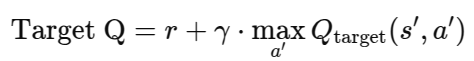

DQN ใช้ Loss แบบ Mean Squared Error

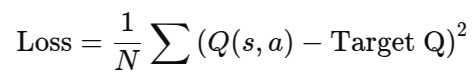

In [ ]:
def calculate_loss(self, non_final_mask, non_final_next_states, state_batch, action_batch, reward_batch):
    # คำนวณ Q(s,a) ของ state ปัจจุบัน โดยเลือก Q เฉพาะ action ที่ทำ
    # ใช้ gather(1, action_batch) เพื่อดึงค่า Q(s,a) สำหรับแต่ละ sample ใน batch
    q_sa = self.policy_net(state_batch).gather(1, action_batch)  # shape: [batch, 1]

    # เตรียม tensor สำหรับ Q(s', a') ของ next state โดยเริ่มจากค่าศูนย์
    next_q = torch.zeros_like(reward_batch).to(self.device)

    # ปิดการคำนวณ gradient (target ไม่ต้อง backprop)
    with torch.no_grad():
        # คำนวณ Q(s', a') จาก target network เฉพาะ state ที่ไม่จบ
        # ใช้ .max(1)[0] เพื่อเลือก Q สูงสุดจาก action ทั้งหมด
        next_q_vals = self.target_net(non_final_next_states).max(1)[0].unsqueeze(1)

        # ใส่ค่า Q(s', a') ลงไปในตำแหน่งที่ไม่ใช่ final state
        next_q[non_final_mask] = next_q_vals

    # คำนวณ target Q(s, a) จาก Bellman equation:
    # Q_target = r + γ * max_a' Q_target(s', a')
    target_q = reward_batch + self.discount_factor * next_q

    # Loss = MSE(Q(s,a), Q_target)
    # เป็นเป้าหมายที่ DQN ใช้ฝึกให้ Q-network ทำนายค่า Q ได้แม่นขึ้น
    return self.criterion(q_sa, target_q)


3. ฟังก์ชั่น generate_sample เอาไว้ใช้ในการ sample transition ต่างๆขึ้นมาจาก replaybuffer รับค่าเข้ามาเป็นจำนวน batch ที่จะเรียก 

โดยฟังก์ชั่นนี้จะ return ออกมาเป็น
-   non_final_mask -> boolean ที่บ่งบอกว่า state นี้ยังไม่จบ
-   non_final_next_states -> เป็น state ที่ยังไม่จบ
-   state_batch -> เป็น batch ของ state ใน memory
-   action_batch -> เป็น batch ของ action ใน memory
-   reward_batch -> เป็น batch ของ reward ใน memory

โดยทั้งหมดนี้จะ return เป็น Tensor 

In [ ]:
def generate_sample(self, batch_size):
        # Ensure there are enough samples in memory before proceeding
        # ========= put your code here ========= #
        # Sample a batch from memory
        # batch = self.memory.sample()
        # ====================================== #
        
        # Sample a batch from memory
        # ========= put your code here ========= #
        if len(self.memory) < batch_size:
            return None

        states, actions, rewards, next_states, dones = self.memory.sample()
        # unwrap dict observations
        states      = [ self._unwrap_obs(s)  for s in states ]
        next_states = [ self._unwrap_obs(s)  for s in next_states ]
        state_batch = torch.stack(
            [torch.as_tensor(s, dtype=torch.float32, device=self.device).view(-1) for s in states]
        )  
        action_batch = torch.tensor(actions, dtype=torch.int64,   device=self.device).unsqueeze(1)
        reward_batch = torch.tensor(rewards, dtype=torch.float32, device=self.device).unsqueeze(1)

        # mask for non‑terminal
        non_final_mask = torch.tensor(
            [not d for d in dones], dtype=torch.bool, device=self.device
        )
        non_final_next_states = torch.stack(
            [torch.as_tensor(s, dtype=torch.float32, device=self.device).view(-1)
            for s, d in zip(next_states, dones) if not d]
        ) if non_final_mask.any() else torch.empty((0, state_batch.size(1)),
                                                dtype=torch.float32, device=self.device)

        return non_final_mask, non_final_next_states, state_batch, action_batch, reward_batch

4. update_policy() 

โดยฟังก์ชั่นนี้จะเป็นการ update policy โดยการนำ sample ขึ้นมาใช้เพื่อคำนวณ loss ระหว่าง policy network และ Target Network ผ่านการคำนวณ Gradient Descent

In [ ]:
    def update_policy(self):
        # Generate a sample batch
        sample = self.generate_sample(self.batch_size)
        if sample is None:
            return
        non_final_mask, non_final_next_states, state_batch, action_batch, reward_batch = sample
        
        # Compute loss
        loss = self.calculate_loss(non_final_mask, non_final_next_states, state_batch, action_batch, reward_batch)

        # Perform gradient descent step
        # ========= put your code here ========= #
        self.optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(self.policy_net.parameters(), 1.0)
        self.optimizer.step()

        return loss.item()

5. update_target_network 

มีไว้ใช้ในการ update target network โดยเราจะมองว่าเราจะให้ความสำคัญกับค่าไหนมากกว่าระหว่าง state จาก policy network หรือ state จาก target network โดยใช้วิธี Soft update

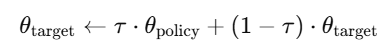

In [ ]:
def update_target_networks(self):
        """
        Soft update of target network weights using Polyak averaging.
        """
        # Retrieve the state dictionaries (weights) of both networks
        # ========= put your code here ========= #
        policy_state  = self.policy_net.state_dict()   # online / policy
        target_state  = self.target_net.state_dict()   # target (to be updated)
        # ====================================== #
        
        # Apply the soft update rule to each parameter in the target network
        # ========= put your code here ========= #
        tau = self.tau
        for key in policy_state:                       # same keys in both dicts
            target_state[key] = tau * policy_state[key] + (1.0 - tau) * target_state[key]
        # ====================================== #
        
        # Load the updated weights into the target network
        # ========= put your code here ========= #
        self.target_net.load_state_dict(target_state)
        # ====================================== #

6. learn() 

เป็น function ที่ใช้ในการเรียนรู้ใน 1 episode โดยจะอยู่ภายใต้ while not done ก็คือรันจนกว่าจะ terminate โดยที่ไม่มี max_steps มาครอบ

เริ่มแรกเราก็จะ select action จาก state ปัจจุบัน โดยใช้ฟังก์ชั่น select_action ซึ่งมาจากการสุ่มแบบ epsilon-greedy แปลงเป็น tensor แล้วนำไปเข้า .step ก็จะได้ next_state, reward และ terminate ออกมา

ถัดมาเราจะเก็บ transition ใส่ buffer memory โดยใช้ memory.add

แล้วเราก็จะมา update policy เพื่อทำการ update weight ในการออก action ต่างๆในแต่ละ state ตาม Function ที่กล่าวไว้ด้านบน 

แล้วก็ทำการ update target network ตามค่า tau ที่กำหนด

In [ ]:
def learn(self, env):
        # ===== Initialize trajectory collection variables ===== #
        # Reset environment to get initial state (tensor)
        # Track total episode return (float)
        # Flag to indicate episode termination (boolean)
        # Step counter (int)
        # ========= put your code here ========= #
        state, _ = env.reset()           # state : np.ndarray
        total_reward = 0.0
        done = False
        timestep = 0
        last_loss = None
        # ====================================== #

        while not done:
            # Predict action from the policy network
            # ========= put your code here ========= #
            action = self.select_action(state)          # int ∈ [0, num_actions)
            action_tensor = torch.tensor([[action]], dtype=torch.int64) # Convert to tensor
            # ====================================== #

            # Execute action in the environment and observe next state and reward
            # ========= put your code here ========= #
            next_state, reward, terminated, truncated,_ = env.step(action_tensor)
            done = terminated or truncated
            # ====================================== #

            # Store the transition in memory
            # ========= put your code here ========= #
            self.memory.add(state, action, reward, next_state, done) # replay buffer

            total_reward += float(reward.item())
            # ====================================== #

            # Update state

            # Perform one step of the optimization (on the policy network)
            loss = self.update_policy()
            last_loss = loss

            # Soft update of the target network's weights
            self.update_target_networks()

            state = next_state
            timestep += 1
            # self.decay_epsilon(5000)
            if done:
                # self.plot_durations(timestep)
                self.decay_epsilon(5000)
                return total_reward, last_loss

#### 2.3.3 MC REINFORCE

1. **calculate_stepwise_returns**

คำนวณค่า return (G_t) แบบย้อนหลังสำหรับทุก timestep ใน trajectory แล้วปรับค่าด้วย normalization เพื่อช่วยให้ฝึก policy ได้เสถียรและมีประสิทธิภาพ

In [ ]:
def calculate_stepwise_returns(self, rewards):
    G = 0  # G_t สำหรับ timestep ปัจจุบัน
    returns = []

    # วนย้อนหลังจาก timestep สุดท้ายกลับไปหา timestep แรก
    for r in reversed(rewards):
        G = r + self.discount_factor * G       # G_t = r_t + γ * G_{t+1}
        returns.insert(0, G)                   # เก็บ G_t ลงต้น list เพื่อให้เรียงจาก t=0 ถึง T

    # แปลงเป็น tensor สำหรับใช้งานใน torch
    returns = torch.tensor(returns, dtype=torch.float32)

    # Normalize ค่า return (ช่วยให้ฝึก stable โดยลดความต่างของ scale)
    if returns.numel() > 1:
        returns = (returns - returns.mean()) / (returns.std() + 1e-8)

    return returns

2. **Generate trajectory**

สร้าง trajectory 1 ชุด โดยให้ agent ทำ action ใน environment( 1 episode)

เก็บข้อมูลดังนี้

- `rewards` >> รางวัลที่ได้รับในแต่ละ timestep

- `log_probs` >> ค่าล็อกของความน่าจะเป็นที่เลือก action:  logπ(a_t∣s_t)

- `trajectory` >> ลำดับของ (state, action) ที่ agent ทำจริง

- `probs` >> distribution ของนโยบายสำหรับทุก timestep (ใช้คำนวณ entropy ได้)

- `returns` >> ค่าผลตอบแทนสะสมแบบลดค่าด้วย discount (G_t) ที่ normalize แล้ว

- `ep_return` >> รางวัลรวมของทั้ง episode (ใช้ดู performance)

ข้อมูลตรงนี้จะเก็บไว้ใช้คำนวณ gradient 

In [ ]:
def generate_trajectory(self, env):
    # เริ่มต้น environment และแปลง state ให้อยู่ในรูป tensor พร้อม batch dim
    state, _ = env.reset()
    state = self._unwrap_obs(state)
    state = torch.tensor(state, dtype=torch.float32, device=self.device).unsqueeze(0)

    # เตรียมตัวแปรสะสมข้อมูล
    rewards = []           # รางวัลที่ได้รับในแต่ละ timestep
    log_probs = []         # log π(a_t | s_t) ที่ใช้ใน policy gradient
    trajectory = []        # เก็บ (state, action) เพื่อ debug หรือวิเคราะห์เพิ่มเติม
    probs_list = []        # เก็บ softmax output (policy probs) → สำหรับ entropy regularization
    ep_return = 0.0        # รางวัลรวมทั้ง episode
    done = False
    timestep = 0

    # วนเล่นจนกว่าจะจบ episode
    while not done:
        probs = self.policy_net(state)                    # [1, num_actions] → softmax distribution
        dist = torch.distributions.Categorical(probs)     # สร้าง distribution สำหรับสุ่ม action
        action = dist.sample()                            # สุ่ม action ตาม prob
        log_prob = dist.log_prob(action)                  # log π(a_t | s_t)

        log_probs.append(log_prob)
        probs_list.append(probs)                          # เก็บ policy prob → ใช้คำนวณ entropy loss

        # แปลง action เป็น tensor → ส่งเข้า env
        action_tensor = torch.tensor([[action.item()]], dtype=torch.int64)
        next_state, reward, terminated, truncated, _ = env.step(action_tensor)
        done = terminated or truncated

        # ดึงค่ารางวัล (รองรับทั้ง torch และ float)
        r = reward.item() if isinstance(reward, torch.Tensor) else float(reward)
        rewards.append(r)
        ep_return += r                                     # สะสม return
        trajectory.append((state, action))                 # เก็บข้อมูล trajectory

        # เตรียม next state สำหรับ timestep ถัดไป
        state = self._unwrap_obs(next_state)
        state = torch.tensor(state, dtype=torch.float32, device=self.device).unsqueeze(0)
        timestep += 1

    # แปลงรายการ log_probs เป็น tensor: shape [T]
    log_probs = torch.stack(log_probs).to(self.device)

    # รวม prob แต่ละ timestep: shape [T, num_actions]
    probs = torch.cat(probs_list, dim=0).to(self.device)

    # คำนวณ return (G_t) จากรางวัลทั้งหมด → normalize ด้วย calculate_stepwise_returns()
    returns = self.calculate_stepwise_returns(rewards)

    return ep_return, returns.to(self.device), log_probs, trajectory, probs


3. **Calculate loss**

คำนวณ loss สำหรับฝึก policy ด้วย REINFORCE พร้อม entropy regularization

**Parameter**
- stepwise_returns (Tensor) >> G_t หรือ return ของแต่ละ timestep (normalized แล้ว)
- log_prob_actions (Tensor) >> log π(a_t | s_t) ของ action ที่ agent เลือกในแต่ละ timestep
- probs (Tensor) >> softmax distribution ของ policy สำหรับทุก timestep
- entropy_coeff (float) >> ค่าสัมประสิทธิ์กำกับ entropy (default: 0.01)

In [ ]:
def calculate_loss(self, stepwise_returns, log_prob_actions, probs, entropy_coeff=0.01):
    # คำนวณ REINFORCE loss: ส่งเสริม action ที่ให้ G_t สูง
    reinforce_loss = -(stepwise_returns * log_prob_actions).sum()

    # คำนวณ entropy: กระตุ้นการ explore โดยทำให้ policy ไม่ตัดสินใจแน่วแน่เกินไป
    entropy = -torch.sum(probs * torch.log(probs + 1e-8), dim=-1).sum()

    # รวม loss ทั้งสอง: ลด reinforce_loss และเพิ่ม entropy เพื่อการเรียนรู้ที่สมดุล
    total_loss = reinforce_loss - entropy_coeff * entropy
    return total_loss

4. **Update policy**

ฟังก์ชันนี้ใช้ข้อมูลจาก trajectory (G_t และ log π) เพื่อคำนวณ gradient แล้วปรับ policy network ด้วย stochastic gradient descent 

In [ ]:
def update_policy(self, returns, log_prob_actions):
    # คำนวณ loss ตามสูตร REINFORCE: -∑ G_t * log π(a_t | s_t)
    loss = -(returns * log_prob_actions).sum()

    # เคลียร์ gradient ที่ค้างอยู่จากรอบก่อน
    self.optimizer.zero_grad()

    # คำนวณ gradient ของ loss ต่อพารามิเตอร์ของ policy
    loss.backward()

    # ปรับพารามิเตอร์ของ policy network ตาม gradient
    self.optimizer.step()

    # ส่งคืนค่าสเกลาร์ของ loss สำหรับบันทึกหรือแสดงผล
    return loss.item()

5. **Learn**

ฟังชันก์นี้ใช้ฝึก policy network 1 episode โดยใช้ข้อมูลจาก trajectory และปรับพารามิเตอร์ด้วย policy gradient

In [ ]:
def learn(self, env):
    # เปิดโหมดฝึก (เปิดใช้ gradient)
    self.policy_net.train()

    # สร้าง trajectory: เล่น 1 episode แล้วเก็บ reward, log_prob, prob distribution ฯลฯ
    episode_return, stepwise_returns, log_prob_actions, trajectory, probs = self.generate_trajectory(env)

    # คำนวณ loss สำหรับฝึก policy → รวมทั้ง reinforce loss และ entropy
    loss = self.calculate_loss(stepwise_returns, log_prob_actions, probs)

    # คืนผลลัพธ์: reward ทั้งตอน, ค่า loss, และข้อมูล trajectory ที่เล่นจริง
    return episode_return, loss, trajectory


#### 2.3.4 Actor-Critic (Deep Deterministic Policy Gradient (DDPG))

##### Class Actor

Actor เป็น Neural Network ที่ทำหน้าที่เป็น Policy ของ Agent 

มีเป้าหมายเพื่อ เรียนรู้ policy ที่เลือก action ดี ๆ เพื่อ maximize reward

**หลักกการทำงาน**

- input >> state 
- output >> action ที่ควรทำใน state นั้น

1. **__init__**

สร้างโครงสร้างของ network และกำหนด optimizer สำหรับฝึก

**Parameter**
- input_dim (int) >> จำนวน feature ของ state
- hidden_dim (int) >> จำนวน neuron ใน hidden layers
- output_dim (int) >> ขนาดของเวกเตอร์ action ที่ต้องการให้ network output
- learning_rate (float) >> ค่าความเร็วในการเรียนรู้ของ optimizer

In [ ]:
def __init__(self, input_dim, hidden_dim, output_dim, learning_rate=1e-4):
    super(Actor, self).__init__()  # เรียก constructor ของ nn.Module เพื่อใช้ฟีเจอร์พื้นฐานของ PyTorch

    # สร้าง layer 1 >> รับ state (input) แล้วแปลงเป็น hidden representation
    self.fc1 = nn.Linear(input_dim, hidden_dim)

    # สร้าง layer 2 >> เพิ่มความลึกให้ network มีความสามารถในการเรียนรู้ฟังก์ชันที่ซับซ้อนขึ้น
    self.fc2 = nn.Linear(hidden_dim, hidden_dim)

    # สร้าง layer 3 >> แปลง hidden → action (ยังไม่ผ่าน activation)
    self.fc3 = nn.Linear(hidden_dim, output_dim)

    # ใช้ ReLU กับ hidden layers เพื่อเพิ่ม non-linearity ให้ network
    self.relu = nn.ReLU()

    # ใช้ tanh ที่ output เพื่อจำกัดค่าการกระทำให้อยู่ในช่วง (-1, 1)
    self.tanh = nn.Tanh()

    # สร้าง Adam optimizer สำหรับใช้ปรับน้ำหนักของ network
    self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)

    # เรียกฟังก์ชันกำหนดค่าน้ำหนักเริ่มต้นให้เหมาะสมก่อนเริ่มฝึก
    self.init_weights()

2. **init_weights**

กำหนดค่าเริ่มต้นให้ weights และ biases ของทุก Linear Layer
- 1. ตั้ง bias = 0 เพื่อให้ network เรียนรู้ bias จากข้อมูลโดยตรง ไม่อิงจากค่าที่สุ่มมา
- 2. กำนหด weights ด้วย Xavier initialization ทำให้ข้อมูลที่ไหลผ่าน network มีความเสถียร 

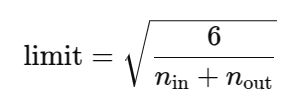

Xavier (หรือ Glorot) Initialization ถูกออกแบบมาเพื่อใช้กับ activation functions ที่ "มีค่าเฉลี่ยอยู่ที่ 0"
เช่น tanh, sigmoid (ในที่นี้เราใช้ tanh เพื่อทำให้ได้ค่าตั้งต้น (-1 , 1)) 
- การใช้ Xavier กับ tanh ช่วยให้ข้อมูลไม่หดหรือขยายเมื่อผ่านหลาย layer → เสถียรตอนเริ่มฝึก


In [ ]:
def init_weights(self):
    for m in self.modules():  # วนลูปทุก module ภายใน network
        if isinstance(m, nn.Linear):  # ตรวจเฉพาะ layer ที่เป็น linear เท่านั้น
            # กำหนดค่า weight ด้วย Xavier uniform initialization ช่วยป้องกันปัญหา gradient หายหรือระเบิดในช่วงเริ่มต้นการฝึก
            nn.init.xavier_uniform_(m.weight)

            # ตั้ง bias ให้เริ่มต้นที่ 0 เพื่อให้ network ค่อย ๆ เรียนรู้ค่าที่เหมาะสมจากข้อมูล โดยไม่มี bias เริ่มต้นที่อาจรบกวนการเรียน
            nn.init.zeros_(m.bias)


3. **forward**

คำนวณผลลัพธ์ของ network จาก input คือ state >> ได้ action

In [ ]:
def forward(self, state):
    # ส่ง state ผ่าน layer แรก และใช้ ReLU เพื่อเพิ่มความไม่เชิงเส้น
    x = self.relu(self.fc1(state))

    # ส่งผ่าน layer ที่สอง และใช้ ReLU อีกครั้ง
    x = self.relu(self.fc2(x))

    # คำนวณค่าดิบของ action โดยยังไม่จำกัดขอบเขต
    x = self.fc3(x)

    # ใช้ tanh เพื่อบีบค่าการกระทำให้อยู่ในช่วง (-1, 1) เป็นค่าตั้งต้นก่อนจะนำไป scale ตาม action_range ภายนอก
    x = self.tanh(x)

    return x


##### Class Critic
Critic ทำหน้าที่ช่วย “ให้คำปรึกษา” กับ Actor ว่า action ที่เลือกมานั้นดีแค่ไหน โดยมีหลักการคือ
- ประมาณค่า Q(s, a) ซึ่งคือค่าผลตอบแทนสะสมที่คาดว่าจะได้จาก state s และทำ action a
- เข้าใจ action ที่ actor เลือกมาในแต่ละ state มีค่า reward ระยะยาวมากน้อยแค่ไหน


1. **__init__**

**Parameter** 
- state_dim (int) >> จำนวน feature ของ state
- action_dim (int) >> ขนาดของเวกเตอร์ action (เช่น 1 สำหรับ continuous action)
- hidden_dim (int) >> จำนวน neuron ใน hidden layers
- learning_rate (float) >> ค่าความเร็วในการเรียนรู้ของ optimizer

In [ ]:
class Critic(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_dim, learning_rate=1e-4):
        super(Critic, self).__init__()  # เรียก constructor ของ nn.Module

    #--------รวม state กับ action แล้วป้อนเข้า network พร้อมกัน---------------#

        # input layer >> (state + action) → hidden
        self.fc1 = nn.Linear(state_dim + action_dim, hidden_dim)

        # hidden layer >> เพิ่มความลึกให้ network เรียนรู้ Q-function ที่ซับซ้อนได้
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)

        # output layer >> คำนวณ Q-value ออกมาเป็น scalar (1 ค่า) 
        self.fc3 = nn.Linear(hidden_dim, 1)

        # ใช้ ReLU กับ hidden layers เพื่อเพิ่ม non-linearity
        self.relu = nn.ReLU()

        # สร้าง optimizer สำหรับฝึก network
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)

        # เรียกฟังก์ชันกำหนดค่าเริ่มต้นของ weights และ biases
        self.init_weights()

2. **init_weights**

ตั้งค่าเริ่มต้นให้ weights และ biases ของทุก Linear Layer
- ตั้ง bias = 0 เพื่อให้ network เรียน bias จากข้อมูลจริง ไม่เริ่มจากค่าสุ่ม
- กำหนด weights ด้วย **Kaiming initialization** เพราะเหมาะกับ ReLU ซึ่งไม่สมมาตร และมีค่าเฉลี่ยเอียงไปทางบวก (เพราะตัดค่าติดลบ)

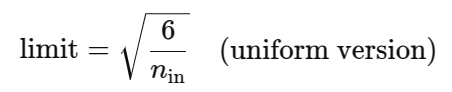


In [ ]:
def init_weights(self):
    for m in self.modules():
        if isinstance(m, nn.Linear):
            # สุ่ม weight ด้วย Kaiming uniform initialization ช่วยให้ค่า output ของแต่ละ neuron ไม่มากหรือน้อยเกินไปเมื่อใช้ ReLU
            nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')

            # ตั้ง bias เป็น 0 เพื่อให้ network เรียนค่าชดเชยจากข้อมูลโดยตรง
            nn.init.zeros_(m.bias)

3. **forward**

ประเมิน Q(s, a) โดยรับ state และ action แล้วส่งผ่าน network

**Parameter** 
- state (Tensor) >> สถานะปัจจุบัน (shape = [batch_size, state_dim])
- action (Tensor) >> action ที่เลือกใน state นี้ (shape = [batch_size, action_dim])

**Returns**
- Tensor >> Q-value ที่ประมาณได้ (shape = [batch_size, 1])

In [ ]:
def forward(self, state, action):
    # รวม state และ action เข้าด้วยกันเป็น input เดียว (ตามแนว feature)
    x = torch.cat([state, action], dim=-1)

    # ส่งผ่าน hidden layers พร้อมใช้ ReLU
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))

    # คำนวณ Q-value จาก layer สุดท้าย (ไม่มี activation เพราะต้องการค่า real number)
    q_value = self.fc3(x)

    return q_value

##### Actor-Critic Class

2. **Select action**

ฟังก์ชันนี้ใช้ในการ เลือก action จาก policy (actor network) สำหรับแต่ละ state ปัจจุบัน

สามารถสุ่ม noise เพิ่มเข้าไปเพื่อทำ exploration ได้ 
- ถ้าไม่มี noise >> เป็น deterministic policy
- ถ้ามี noise >> เป็น stochastic policy ซึ่งช่วยให้ agent สำรวจ environment ได้ดีขึ้น


In [ ]:
def select_action(self, state, noise=0.0):
    # แปลง state เป็น tensor และย้ายไป device เดียวกับ network
    s = self._unwrap_obs(state).to(self.device)

    # เพิ่ม batch dim ถ้า state เป็นเวกเตอร์ 1 มิติ
    if s.ndim == 1:
        s = s.unsqueeze(0)

    # ใช้ actor network ทำนาย action โดยไม่คำนวณ gradient
    with torch.no_grad():
        a = self.actor(s)[0].cpu().numpy()

    # เพิ่ม noise แบบสุ่มเพื่อให้ agent สำรวจ action ใหม่ ๆ ระหว่างการฝึก
    if noise > 0.0:
        a += noise * np.random.randn(*a.shape)

    # บีบค่าการกระทำให้อยู่ในช่วง (-1, 1) เพื่อให้เหมาะกับ activation tanh ของ actor
    # และป้องกันไม่ให้ action ที่เบี่ยงเบนจาก noise เกินขอบเขตที่ระบบรองรับ
    a = np.clip(a, -1.0, 1.0)

    # แปลง action จากช่วง (-1, 1) → เป็นช่วงจริงของ environment เช่น [-2.5, 2.5]
    return self.scale_action(a), a

**3. Generate sample**

ฟังก์ชันนี้ใช้ในการดึงข้อมูลจาก replay buffer มาเป็น batch เพื่อใช้ train actor และ critic


In [ ]:
def generate_sample(self, batch_size):
    # ถ้า buffer ยังเก็บข้อมูลไม่ถึง batch_size → ข้ามการฝึกไปก่อน
    if len(self.memory) < batch_size:
        return None

    # สุ่มข้อมูลจาก buffer: (s, a, r, s', done)
    states, actions, rewards, next_states, dones = self.memory.sample()

    # แปลง state → tensor และย้ายไปยัง device (รองรับ multi-agent/dict)
    state_batch = torch.stack([self._unwrap_obs(s) for s in states]).to(self.device)
    next_state_batch = torch.stack([self._unwrap_obs(s2) for s2 in next_states]).to(self.device)

    # แปลง action เป็น tensor แบบ float
    action_batch = torch.stack([
        torch.as_tensor(a, dtype=torch.float32) for a in actions
    ]).to(self.device)

    # แปลง reward ให้เป็น tensor และ reshape เป็น [batch_size, 1]
    reward_batch = torch.stack([
        r if torch.is_tensor(r) else torch.tensor(r, dtype=torch.float32)
        for r in rewards
    ]).to(self.device).view(-1, 1)

    # แปลง done flag เป็น tensor เพื่อใช้คำนวณ Bellman target ได้ถูกต้อง
    done_batch = torch.stack([
        d if torch.is_tensor(d) else torch.tensor(d, dtype=torch.float32)
        for d in dones
    ]).to(self.device).view(-1, 1)

    # คืนค่าทั้งหมดในรูปแบบที่พร้อมสำหรับการฝึก neural network
    return state_batch, action_batch, reward_batch, next_state_batch, done_batch


**4. Calculate loss**

ฟังชันก์นี้ใช้คำนวณ loss ที่ใช้ในการฝึกทั้ง Critic และ Actor โดย

- Actor loss ใช้เพื่อให้ Actor เรียนรู้ที่จะเลือก action ที่ทำให้ Q(s, π(s)) สูงที่สุด
    - หลักการคือ อยากเพิ่ม Q → เราต้อง “ลด” ค่า  −Q

        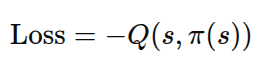

- Critic loss ใช้คำนวณว่า Q(s, a) ที่ Critic ทำนาย คลาดเคลื่อนจากค่าเป้าหมาย มากแค่ไหน

    - ใช้ Bellman Equation ในการเปรียบกับค่าที่ Critic ประมาณจริงเพื่อคำนวณ MSE loss

        Bellman Equation

        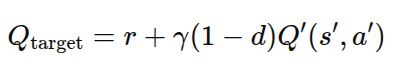 

        Critic loss

        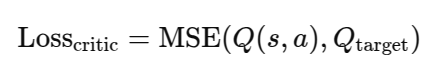

        - q คือ Q ที่ Critic หลักพยายามทำนาย
        - q_target คือค่าจาก Bellman ที่ใช้เป็น “คำตอบที่ถูกต้อง”


In [ ]:
def calculate_loss(self, states, actions, rewards, next_states, dones):
    # ----------- Critic Loss ----
    # ปิด gradient เพื่อคำนวณ target Q โดยไม่กระทบพารามิเตอร์
    with torch.no_grad():
        # ประมาณ action ถัดไปจาก target actor
        next_actions = self.actor_target(next_states)

        # คำนวณ Q target จาก Bellman equation >>  Q_target = r + γ * (1 - done) * Q'(s', a')
        q_tgt = rewards + self.gamma * (1 - dones) * self.critic_target(next_states, next_actions)

    # คำนวณ Q(s, a) จาก critic หลัก
    q = self.critic(states, actions)

    # Loss ของ critic = MSE(Q, Q_target)
    critic = self.mse(q, q_tgt)

    # ----------- Actor Loss --------------
    # Actor พยายามเลือก action ที่ maximize Q(s, π(s)) ดังนั้นใช้ negative mean Q เพื่อให้ gradient descent >> policy ดีขึ้น
    actor = -self.critic(states, self.actor(states)).mean()

    return critic, actor


5. **Update policy**

ฟังก์ชันนี้ใช้เพื่อ อัปเดตพารามิเตอร์ของ Actor และ Critic ในแต่ละรอบการฝึก (training step) โดยอาศัย loss ที่คำนวณจาก calculate_loss()

- Update Actor  >> ปรับ policy ให้เลือก action ที่ Q สูง

- Update Critic >> ทำให้ Q-function แม่นขึ้น

- Update Target >> ควบคุมความเสถียรของ Q target โดยใช้ Polyak averaging

    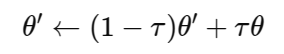

    - 𝜃'= พารามิเตอร์ของ target network

    - 𝜃 = พารามิเตอร์ของ network หลัก

    - 𝜏 = ค่าผสม เช่น 0.005 (ผสมช้า = เปลี่ยนน้อย)

In [ ]:
def update_policy(self):
    # ดึงชุดข้อมูล mini-batch จาก replay buffer
    batch = self.generate_sample(self.batch_size)
    if batch is None:
        return  # ถ้า buffer ยังมีข้อมูลไม่พอ → ข้ามรอบนี้ไป

    states, actions, rewards, next_states, dones = batch

    # ทำ normalization กับ reward เพื่อให้ gradient มีสเกลที่เหมาะสม → ลดปัญหา training ไม่เสถียร
    rewards = (rewards - rewards.mean()) / (rewards.std() + 1e-7)

    # ------------------  Critic Update ------------------
    # สร้าง target Q-value ตาม Bellman equation โดยใช้ target networks
    with torch.no_grad():
        next_actions = self.actor_target(next_states)  # คำนวณ action ถัดไปด้วย target actor
        q_target = rewards + self.gamma * (1 - dones) * \
                   self.critic_target(next_states, next_actions)  # Bellman Target: Q_target = r + γ(1 - d)Q′(s′, a′)

    # คำนวณ Q(s, a) จาก critic หลัก
    q = self.critic(states, actions)

    # หาค่าความคลาดเคลื่อน (loss) ระหว่าง Q ที่ทำนาย กับ Q_target
    critic_loss = self.mse(q, q_target)

    # อัปเดตพารามิเตอร์ของ critic ด้วย gradient descent
    self.critic_opt.zero_grad()
    critic_loss.backward()
    nn.utils.clip_grad_norm_(self.critic.parameters(), 10.0)  # ป้องกัน gradient ระเบิด
    self.critic_opt.step()

    # ------------------  Actor Update ------------------
    # ประเมินคุณภาพของ action ที่ actor ปัจจุบันเลือก โดยใช้ critic
    # เราต้องการเพิ่ม Q → จึงใช้ -Q เพื่อให้ gradient descent ปรับไปในทางที่ Q สูงขึ้น
    actor_loss = -self.critic(states, self.actor(states)).mean()

    # อัปเดตพารามิเตอร์ของ actor
    self.actor_opt.zero_grad()
    actor_loss.backward()
    nn.utils.clip_grad_norm_(self.actor.parameters(), 10.0)
    self.actor_opt.step()

    # ------------------  Soft Update (Target Networks) ------------------
    # อัปเดต target networks แบบ soft → ค่อย ๆ ผสมค่าจาก network หลัก (Polyak averaging)
    with torch.no_grad(): # ปิด gradient เพราะเราไม่ฝึก target network
        # อัปเดต actor_target จาก actor หลัก
        for t, s in zip(self.actor_target.parameters(), self.actor.parameters()):
            # t ← (1 - τ) * t + τ * s
            t.data.mul_(1 - self.tau).add_(self.tau * s.data)
        # อัปเดต critic_target จาก critic หลัก
        for t, s in zip(self.critic_target.parameters(), self.critic.parameters()):
            t.data.mul_(1 - self.tau).add_(self.tau * s.data)

    # คืนค่า loss สำหรับทั้ง actor และ critic
    return actor_loss.item(), critic_loss.item()



6. **Update target networks**

เป็นฟังชั่นที่ใช้ Update Target เหมือนกับ update policy ต่างกันที update_target_networks เราจะเรียกใช้เมื่อไหร่ก็ได้ ไม่ต้องเรียกทุกครั้งหลังจากฝึก actor และ critic เสร็จในแต่ละรอบ


In [ ]:
def update_target_networks(self, tau=None):
    if tau is None:
        tau = self.tau  # ใช้ค่าจาก class ถ้าไม่ได้กำหนดเอง

    # อัปเดตพารามิเตอร์ของ target actor
    for target_param, param in zip(self.actor_target.parameters(), self.actor.parameters()):
        target_param.data.copy_(tau * param.data + (1 - tau) * target_param.data)

    # อัปเดตพารามิเตอร์ของ target critic
    for target_param, param in zip(self.critic_target.parameters(), self.critic.parameters()):
        target_param.data.copy_(tau * param.data + (1 - tau) * target_param.data)


7. **Learn** 

ฝึก agent เล่นใน environment ทีละ step พร้อมเก็บข้อมูลและอัปเดต policy

In [ ]:
def learn(self, env, max_steps, num_agents, noise_scale=0.1, noise_decay=0.99):
    # ---- เริ่มต้น episode ใหม่ ----
    state, _ = env.reset()

    # ถ้า environment ส่ง state มาในรูป dict → ดึง field 'policy'
    if isinstance(state, dict) and 'policy' in state:
        state = state['policy']

    ep_ret = 0.0              # สะสมค่ารางวัลรวมทั้ง episode (episode return)
    noise = noise_scale       # ค่าเริ่มต้นของ exploration noise
    last_a_loss = None        # สำหรับเก็บ actor loss รอบสุดท้าย
    last_c_loss = None        # สำหรับเก็บ critic loss รอบสุดท้าย

    # ---- วน loop ภายในหนึ่ง episode ----
    for _ in range(max_steps):
        act_scaled_list, act_raw_list = [], []

        # --- ทำ action สำหรับแต่ละ agent ---
        for i in range(num_agents):
            a_s, a_r = self.select_action(state[i], noise)  # a_s = action หลัง scale, a_r = ก่อน scale
            act_scaled_list.append(a_s)
            act_raw_list.append(a_r)

        # รวม action ทุก agent เข้า batch → ส่งเข้า environment
        act_scaled = torch.cat(act_scaled_list, dim=0)

        step_out = env.step(act_scaled)  # เล่น 1 timestep

        # แยกผลลัพธ์จาก environment (รองรับทั้งรูปแบบ Gym ใหม่/เก่า)
        if len(step_out) == 5:
            next_state, reward, terminated, truncated, _ = step_out
            if isinstance(next_state, dict) and 'policy' in next_state:
                next_state = next_state['policy']
            done_flag = [t or tr for t, tr in zip(terminated, truncated)]  # True ถ้า ep จบ
        else:
            next_state, reward, done_flag, _ = step_out

        # ---- เก็บ transition ของแต่ละ agent เข้า replay buffer ----
        for i in range(num_agents):
            r = reward[i]
            d = done_flag[i]

            # แปลง tensor → float / bool สำหรับเก็บลง buffer
            r = r.item() if torch.is_tensor(r) and r.numel() == 1 else float(r[0]) if torch.is_tensor(r) else float(r)
            d = d.item() if torch.is_tensor(d) and d.numel() == 1 else bool(d[0]) if torch.is_tensor(d) else bool(d)

            self.memory.add(
                self._unwrap_obs(state[i]),                        # state ปัจจุบัน
                torch.as_tensor(act_raw_list[i], dtype=torch.float32),  # action ที่เลือก
                r,                                                 # reward
                self._unwrap_obs(next_state[i]),                   # state ถัดไป
                d                                                  # done flag
            )

            ep_ret += r  # สะสมรางวัลของ agent นี้เข้าค่า episode return

        # ---- อัปเดตพารามิเตอร์ของ actor และ critic ----
        actor_loss, critic_loss = self.update_policy()
        last_a_loss = actor_loss
        last_c_loss = critic_loss

        # เตรียม state สำหรับ timestep ถัดไป
        state = next_state

        # ลดค่า noise ลงเรื่อย ๆ (decay) → ส่งเสริมการ exploit เมื่อฝึกนานขึ้น
        noise *= noise_decay

        # หยุดถ้า agent ทุกตัวจบ episode แล้ว
        if all(bool(d) for d in done_flag):
            break

    # คืนค่า: reward รวมทั้ง episode + loss ล่าสุดของทั้ง 2 network
    return float(ep_ret), last_a_loss, last_c_loss


## Part 3: Training and Playing the Agent

## Part 4: Agent Performance Evaluation